In [1]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [2]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

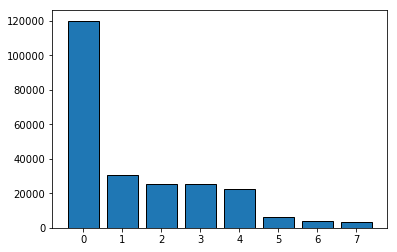

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [4]:
counts = tweets["candidate"].value_counts()
plt.rcParams['patch.force_edgecolor'] = True
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

In [5]:
type(counts)

pandas.core.series.Series

In [6]:
counts.shape

(8L,)

In [7]:
counts

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64

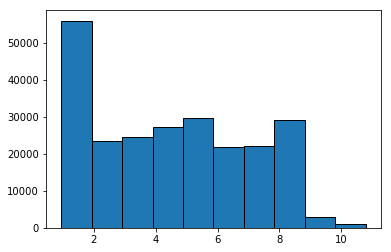

In [8]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

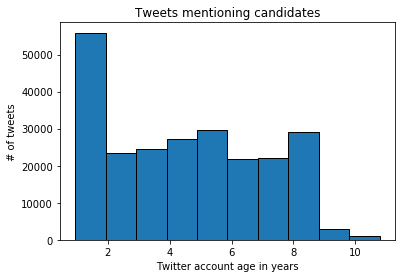

In [9]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

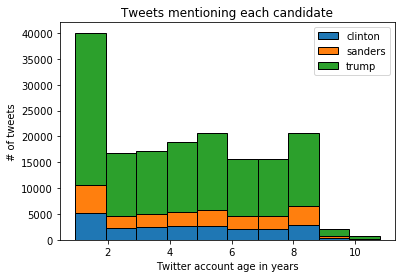

In [10]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

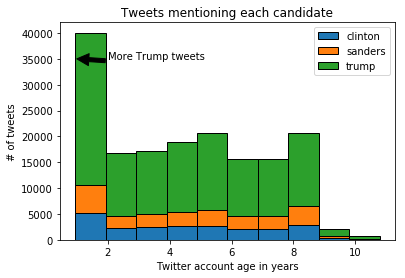

In [11]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

In [12]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

In [13]:
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text,candidate,user_age,red,blue
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10 00:18:57,NaN,NaN,2011-11-17 02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...,"clinton,sanders",5.435558,0.007843,0.188235
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10 00:18:57,NaN,18 // PSJAN,2012-12-24 17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...,trump,4.329760,0.752941,0.929412
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10 00:18:57,NaN,NaN,2012-10-11 14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...,trump,4.532849,0.752941,0.929412
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10 00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16 07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...,trump,3.182954,0.752941,0.929412
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10 00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21 01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ...",trump,8.095951,0.074510,0.086275


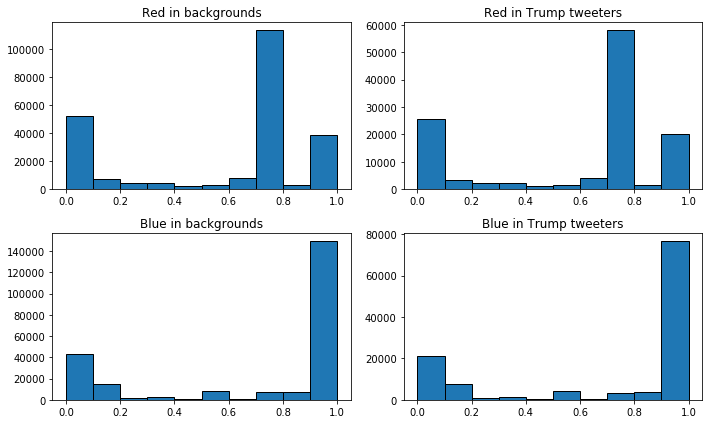

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [15]:
tweets["user_bg_color"].value_counts().head(20)

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
Name: user_bg_color, dtype: int64

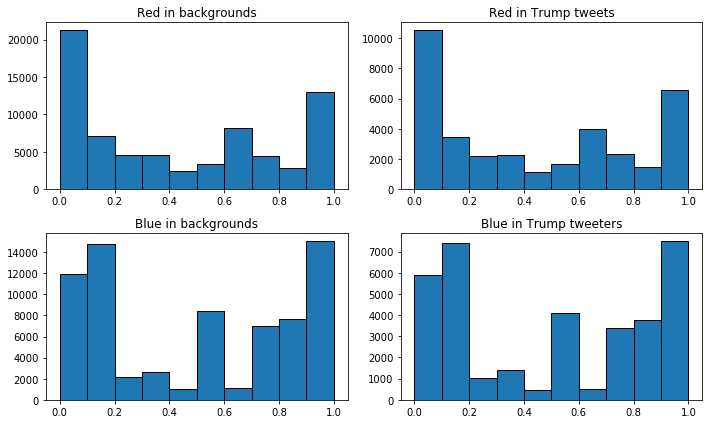

In [16]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

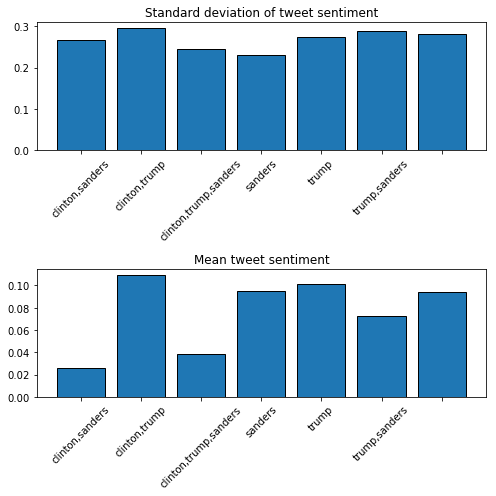

In [17]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [18]:
gr.head(10)

id                            id_str                \
                         mean           std                mean           std   
candidate                                                                       
                       114051  69038.411627  729989453839915392  1.139204e+14   
clinton                115994  69871.102682  729988642607237504  1.148107e+14   
clinton,sanders        123473  64977.660361  730011481452253440  1.040853e+14   
clinton,trump          118149  68119.530320  729998900142776576  1.105836e+14   
clinton,trump,sanders  134276  57926.692198  730041882827746176  7.844409e+13   
sanders                122447  68065.594312  730003281480133376  1.090488e+14   
trump                  118798  68853.491233  729995756662231168  1.121942e+14   
trump,sanders          120208  66415.967726  730002471407623936  1.084844e+14   

                      retweet_count       polarity           user_followers  \
                               mean  std      mean       std           mean   
candidate                                                                     
                                  0  0.0  0.048885  0.289333    4641.061308   
clinton                           0  0.0  0.026005  0.267020    7758.054955   
clinton,sanders                   0  0.0  0.109311  0.294225    4481.819325   
clinton,trump                     0  0.0  0.038789  0.244355    8143.059336   
clinton,trump,sanders             0  0.0  0.094801  0.230442    6215.479498   
sanders                           0  0.0  0.101664  0.274370    3650.571812   
trump                             0  0.0  0.072180  0.287278    9526.672786   
trump,sanders                     0  0.0  0.094110  0.281690    7820.137137   

                                     subjectivity            user_age  \
                                 std         mean       std      mean   
candidate                                                               
                        54755.981308     0.276616  0.341894  4.740367   
clinton                209809.505871     0.268818  0.314952  4.528229   
clinton,sanders         60464.982064     0.300500  0.316764  4.652964   
clinton,trump          154826.249150     0.264287  0.309343  4.255380   
clinton,trump,sanders  203374.625549     0.348322  0.316337  4.677962   
sanders                 40678.416402     0.283606  0.320596  4.686725   
trump                  262583.312200     0.294326  0.323274  4.449188   
trump,sanders          200375.334076     0.307191  0.307962  4.719702   

                                      red                blue            
                            std      mean       std      mean       std  
candidate                                                                
                       2.524116  0.554687  0.354548  0.654722  0.391827  
clinton                2.498144  0.580907  0.344258  0.689780  0.376897  
clinton,sanders        2.491408  0.551454  0.355468  0.650755  0.391646  
clinton,trump          2.378121  0.602982  0.335776  0.714623  0.367081  
clinton,trump,sanders  2.544048  0.558014  0.359498  0.656357  0.392673  
sanders                2.518182  0.554871  0.354363  0.654992  0.389118  
trump                  2.494298  0.587575  0.343957  0.691149  0.377203  
trump,sanders          2.549388  0.567172  0.350220  0.673444  0.384011

In [19]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

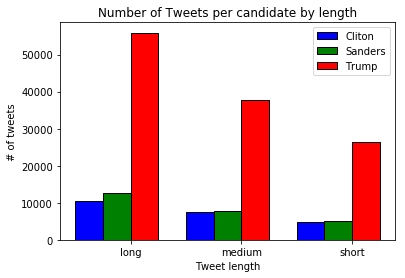

In [20]:
width = .5
x = np.array(range(0, 6, 2))
plt.bar(x, tl["clinton"], width, color='b', label='Cliton')
plt.bar(x + width, tl["sanders"], width, color='g', label='Sanders')
plt.bar(x + (width * 2), tl["trump"], width, color='r', label='Trump')

plt.ylabel('# of tweets')
plt.title('Number of Tweets per candidate by length')
plt.xticks(x + (width * 1.5), ['long', 'medium', 'short'])
#plt.xticklabels(('long', 'medium', 'short'))
plt.xlabel('Tweet length')
plt.legend()
plt.show()